In [1]:
import pandas as pd
import keras
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.metrics import precision_recall_fscore_support
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout

In [2]:
import tensorflow as tf
print(tf.config.list_physical_devices('GPU'))

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [3]:
data = pd.read_csv('../data/feature_sets/only_in_game_data_v1.csv')
data.head()

,blue_team_total_gold,blue_team_inhibitors,blue_team_towers,blue_team_barons,blue_team_total_kills,blue_team_ocean_drakes,blue_team_cloud_drakes,blue_team_mountain_drakes,blue_team_chemtech_drakes,blue_team_infernal_drakes,...,format,game_in_format,red_team_outcome,season_format,riot_match_id,min_start_time,month,day,year,time_in_game
0,0,0,0,0,0,0,0,0,0,0,...,2,1,0,0,111561337007371296,2024-04-14 06:00:00+00:00,4,14,2024,0.0
1,2500,0,0,0,0,0,0,0,0,0,...,2,1,0,0,111561337007371296,2024-04-14 06:00:00+00:00,4,14,2024,0.0
2,2500,0,0,0,0,0,0,0,0,0,...,2,1,0,0,111561337007371296,2024-04-14 06:00:00+00:00,4,14,2024,1.0
3,2500,0,0,0,0,0,0,0,0,0,...,2,1,0,0,111561337007371296,2024-04-14 06:00:00+00:00,4,14,2024,1.0
4,2500,0,0,0,0,0,0,0,0,0,...,2,1,0,0,111561337007371296,2024-04-14 06:00:00+00:00,4,14,2024,1.0


In [4]:
columns_to_drop = [
'riot_match_id',
'min_start_time',

'patch_version',
 'blue_team_id',
 'blue_top_player',
 'blue_jungle_player',
 'blue_mid_player',
 'blue_bot_player',
 'blue_supp_player',
 'red_team_id',
 'red_top_player',
 'red_jungle_player',
 'red_mid_player',
 'red_bot_player',
 'red_supp_player',
 'league',
 'format',
 'game_in_format',
 'season_format',
 'month',
 'day',
 'year'
 ]

In [5]:
extar_info = data[columns_to_drop]
data.drop(columns=columns_to_drop,inplace=True)


In [6]:
true_labels = data.pop('red_team_outcome')


In [7]:
num_input = len(data.columns)
num_input

115

In [8]:
model = Sequential()
model.add(Dense(1024, input_shape=(num_input,), activation='relu'))
model.add(Dense(2048, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(4096, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(8192, activation='relu'))
model.add(Dense(8192, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(4096, activation='leaky_relu'))
model.add(Dropout(0.1))
model.add(Dense(2048, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(512, activation='relu'))
model.add(Dense(256, activation='relu'))

model.add(Dense(1, activation='sigmoid'))

In [9]:
model.load_weights('../predictor/saved_models/only_in_game_data_v1.keras')

In [10]:
all_results = model.predict(data)

14283/14283 [==============================] - 41s 3ms/step


In [11]:
fpr, tpr, threshold = metrics.roc_curve(true_labels, all_results)
roc_auc = metrics.auc(fpr, tpr)

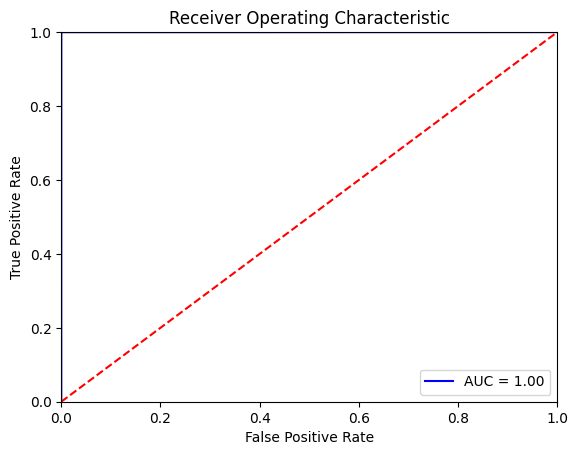

In [12]:
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

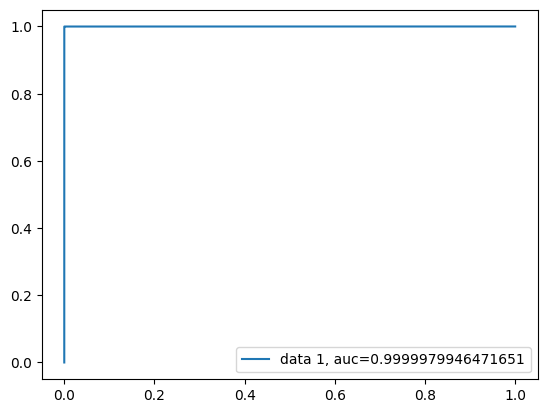

In [15]:
auc = metrics.roc_auc_score(true_labels, all_results)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [17]:
threshold_results = []
for result in all_results:
    if result > 0.5:
        threshold_results.append(1)
    else:
        threshold_results.append(0)


Good balance of classes

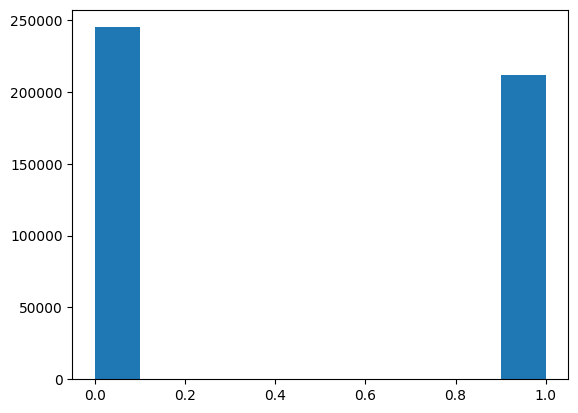

In [18]:
plt.hist(true_labels)
plt.show() 

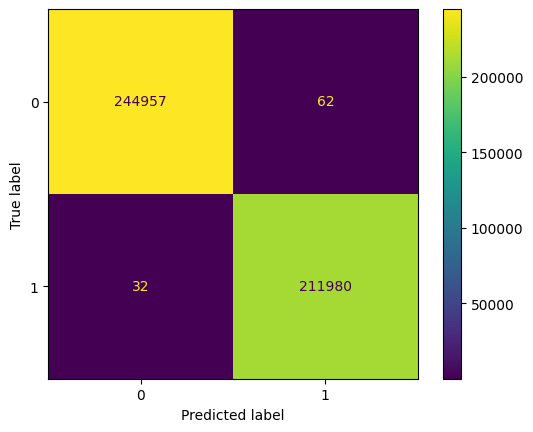

In [19]:
confusion_matrix = metrics.confusion_matrix(true_labels, threshold_results)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0, 1])

cm_display.plot()
plt.show()

In [21]:
list(data.columns)

['blue_team_total_gold',
 'blue_team_inhibitors',
 'blue_team_towers',
 'blue_team_barons',
 'blue_team_total_kills',
 'blue_team_ocean_drakes',
 'blue_team_cloud_drakes',
 'blue_team_mountain_drakes',
 'blue_team_chemtech_drakes',
 'blue_team_infernal_drakes',
 'blue_team_hextech_drakes',
 'blue_team_elder_drakes',
 'blue_top_total_gold',
 'blue_top_level',
 'blue_top_kills',
 'blue_top_deaths',
 'blue_top_assists',
 'blue_top_creep_score',
 'blue_top_current_health',
 'blue_top_max_health',
 'blue_jungle_total_gold',
 'blue_jungle_level',
 'blue_jungle_kills',
 'blue_jungle_deaths',
 'blue_jungle_assists',
 'blue_jungle_creep_score',
 'blue_jungle_current_health',
 'blue_jungle_max_health',
 'blue_mid_total_gold',
 'blue_mid_level',
 'blue_mid_kills',
 'blue_mid_deaths',
 'blue_mid_assists',
 'blue_mid_creep_score',
 'blue_mid_current_health',
 'blue_mid_max_health',
 'blue_bot_total_gold',
 'blue_bot_level',
 'blue_bot_kills',
 'blue_bot_deaths',
 'blue_bot_assists',
 'blue_bot_cree